# Chapter: Geodesy


A geodesic dilation is a dilation in which the structuring element is a geodesic disk instead of an euclidian disk. The geodesic disk definition is based on the geodesic distance: the geodesic distance between points A and B in the mask M is defined as the minimal length of a path linking points A and B and included in the mask, the reference mask. The geodesic distance takes into account the topology of the image.

The figure below shows geodesic disks of increasing size $\lambda$ inside the mask $X$ and located in point $z$: $B_{X,\lambda}(z)$.

<img src="../illustrations/geodesic_disk.png" title="geodesic disk" width = "200px" title="Geodesic Ball">

 <center>Geodesic disks.</center>


A geodesic dilation of size N is performed as N iterations of a unitary geodesic dilation. The elementary geodesic dilation is defined as the intersection between the elementary dilation with the mask M (a geodesic dilation can never go over the mask):
$$\delta_M^1 = \delta \cap M$$
$$\delta_M^n = \delta_M^1 \delta_M^1.... \delta_M^1; ; n ~ times$$

 



<img src = "../illustrations/geoDil_illustration.png" width = "300px" title = "GeoDil">

In [2]:
import sys
sys.path.append('/home/commun/tp-morpho/')
from tp_init import *

## Opening and closing by reconstruction

Compare several openings to their corresponding openings by reconstruction.

In particular, take the example of the image retina2.png and the supremum of openings by different segments (use the function <code>ImSupOpen</code> you implemented earlier). The geodesical dilation of a marker image under a reference image is obtained by applying the function <code>build(imMarker, imRef imOut)</code>.

For a reconstruction based on an opening by a simple structuring element <code>nl</code> you may apply <code>buildOpen(imIn, imOut, nl)</code>.

For an area opening, use <code>areaOpen(imIn,size,imBuild,nl)</code>.

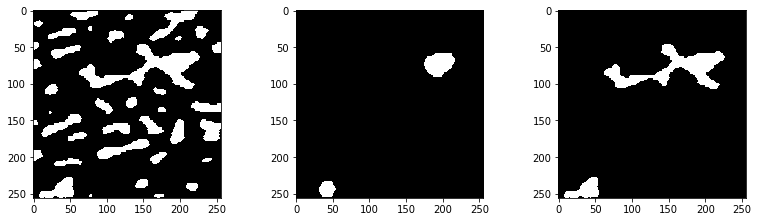

In [3]:
# Opening by reconstruction on a binary image

imIn = Image(images_dir + 'Bin/metal1.png')
imOpen, imBuild = Image(imIn), Image(imIn)
size= 10
nl =HexSE()
open(imIn, imOpen, nl(size))
build(imOpen, imIn, imBuild)

disp([imIn, imOpen, imBuild])

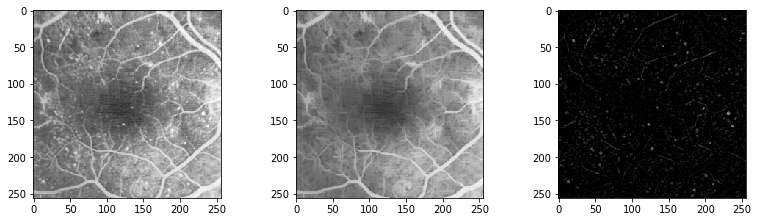

original, supremum of openings and corresponding residue


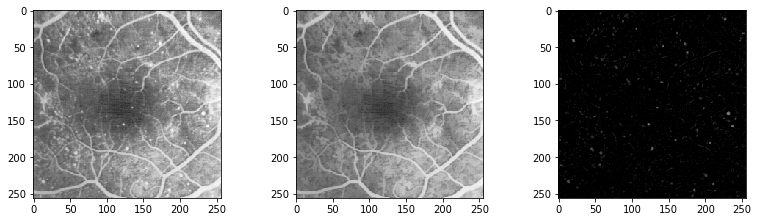

original, reconstruction after supremum of openings and corresponding residue


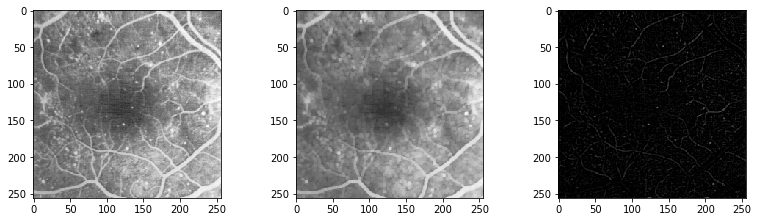

original, opening and corresponding residue


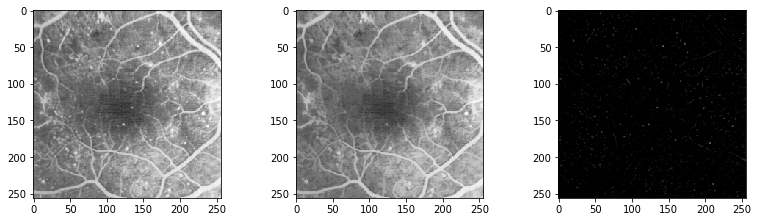

original, buildOpen and corresponding residue


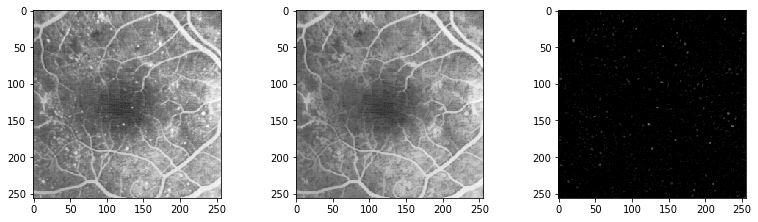

original, areaOpen and corresponding residue


In [4]:
def ImSupOpen(imIn,size,imOut):
    diagonal1SE = StrElt(False,(0,4,8))
    diagonal2SE = StrElt(False,(0,2,6))

    # Opening that combines openings by segments in different directions 

    imTmp = Image(imIn)
    
    # Horizontal and vertical directions
    open(imIn,imTmp,VertSE(size))
    open(imIn,imOut,HorizSE(size))
    sup(imTmp,imOut,imOut)

    # Diagonal directions
    open(imIn,imTmp,diagonal1SE(size))
    sup(imTmp,imOut,imOut)

    open(imIn,imTmp,diagonal2SE(size))
    sup(imTmp,imOut,imOut)


nl = SquSE()
imIn=Image( images_dir + "/Gray/retina.png")
# Load input image and allocates intermediate images
imSup,imBuild,imResidue =Image(imIn),Image(imIn),Image(imIn)

    
ImSupOpen(imIn,4,imSup)
sub(imIn, imSup, imResidue)
disp([imIn,imSup,imResidue])
print("original, supremum of openings and corresponding residue")

build(imSup, imIn, imBuild)
sub(imIn, imBuild, imResidue)
disp([imIn,imBuild,imResidue])
print("original, reconstruction after supremum of openings and corresponding residue")

imOpen = Image(imIn)
open(imIn, imOpen, nl)
sub(imIn, imOpen, imResidue)
disp([imIn,imOpen,imResidue])
print("original, opening and corresponding residue")

buildOpen(imIn, imBuild, nl)
sub(imIn, imBuild, imResidue)
disp([imIn,imBuild,imResidue])
print("original, buildOpen and corresponding residue")

areaOpen(imIn,20,imBuild,nl)
sub(imIn, imBuild, imResidue)
disp([imIn,imBuild,imResidue])
print("original, areaOpen and corresponding residue")


## Geodesic dilation

Geodesic dilations can also be applied to gray level images. The intersection is just replaced by an infimum. The first figure above shows the result of a geodesic dilation of different sizes. The input image (marker) is an image with a single pixel different from zero, located in the right side of the razor.  The reference mask is the original image. The single point is dilated (step by step) and the result is intersected (step by step as well) by the original image (the mask). This is why the left hand side of the razor  appears, for the dilations of small size, with a low gray level (similar to the background level). The reason is that short paths starting from the single point of the marker (in the right hand side) and reaching the razor's left hand side, are forced to go through the razor hole. Then the infimum operation makes the gray level go down. By construction, once this gray level has gone down, it cannot raise again. Therefore the razor's left hand side appears with the gray level of the razor's hole. When the dilation is of larger size, there are paths linking the right and left side without going through the hole and then the gray level value of the left hand side is higher. When the size is large enough to go around the razor, the razor will be fully reconstructed.


The geodesic path from the right to the left hand side of the razor goes around it. This is why when increasing the path length (dilation size), the gray level of the left hand side of the razor increases. It can be seen  as a mountain range ("cordillera"). The path going from point A to point B of high altitude avoids  passing through the valley. In other words, the Euclidean distance goes through the valley, the geodesic one surrounds it.

In [5]:
imIn = Image(images_dir+"/Gray/tools.png")
imMark,imOut20,imOut40,imOut60 = Image(imIn),Image(imIn),Image(imIn),Image(imIn)

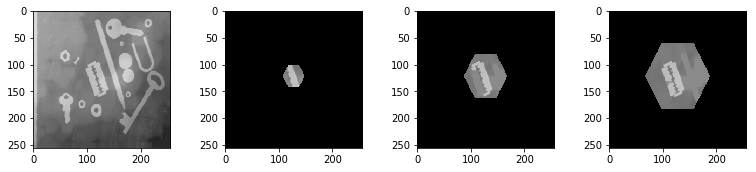

In [6]:
nl = HexSE()
fill(imMark,0)
imMark.setPixel(127,122, 255)
geoDil(imMark,imIn,imOut20,nl(20))

copy(imOut20,imMark)
geoDil(imMark,imIn,imOut40,nl(20))

copy(imOut40,imMark)
geoDil(imMark,imIn,imOut60,nl(20))
disp([imIn,imOut20,imOut40,imOut60])


## Reconstruction

<img src="../illustrations/reconstruction_illustration.png" width="500px;" title="build">

The geodesic dilation iterated until idempotence is named reconstruction. The figure above shows an example of reconstruction. The dual reconstruction can be defined too, iterating until idempotence a geodesic erosion ($\varepsilon_f(g) = \varepsilon(g) \cup f$), where $g$ is the marker and $f$ the mask.

The reconstruction is involved in many useful operators. When one carefully choses markers and mask in a reconstruction process, many operators can be defined. Among others, we can cite: h-minima  (marker: $f-h$; mask: $f$), swamping (marker: selected markers; mask: $f$ or its gradient) used to reduce oversegmentation, fill-holes (marker: image border; mask: $f$).

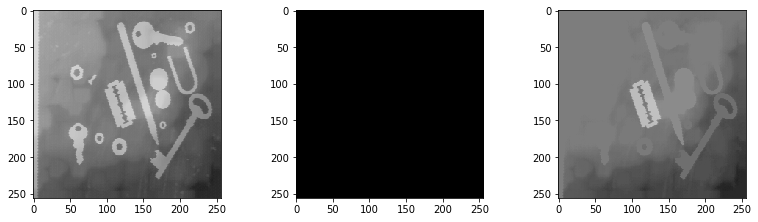

In [7]:
imIn = Image(images_dir+"/Gray/tools.png")
imMark,imres = Image(imIn),Image(imIn)

nl = HexSE()
fill(imMark,0)
imMark.setPixel(127,122, 255)
build(imMark,imIn,imres,nl)
disp([imIn,imMark,imres])

## Regional Maxima

Compute the regional maxima of the image “Gray/tools.png”. Reconstruct the original image from two pixels situated in two bright regions. Compute the regional maxima of the reconstructed image. The same technique is used for segmentation in order to avoid the over-segmentation of the watershed transformation.

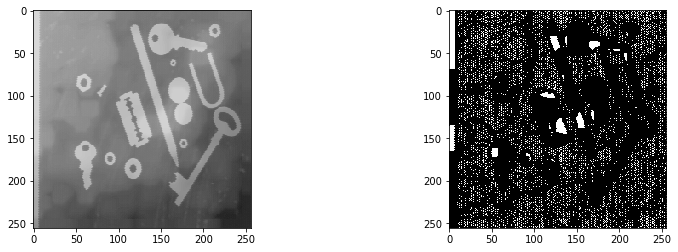

In [8]:
imIn = Image(images_dir+"/Gray/tools.png")
imMax = Image(imIn)
maxima(imIn, imMax)
disp([imIn, imMax])

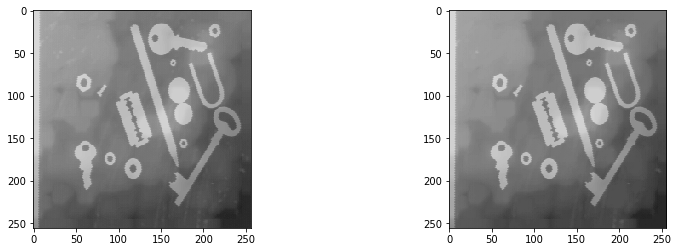

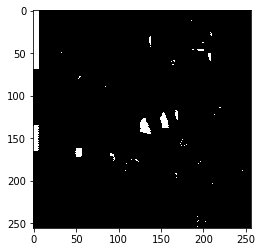

In [10]:
x1, y1 = 135, 140, #150, 110
x2, y2 = 160, 45
imMark = Image(imIn)
#fill(imMark,0)
#imMark.setPixel(x1,y1, 255)
#imMark.setPixel(x2,y2, 255)
hMaxima(imIn, 10, imMark)
imBuild =Image(imIn)
build(imMark, imIn, imBuild)
disp([imIn, imBuild])
maxima(imBuild, imMax)
disp(imMax)

We see that after reconstruction from markers we get no more maxima than the number of markers.

## H-minima

The number of minima of an image is usually very high (leading to the well known oversegmentation problem of the watershed operator). The operator H-minima selects the minima that have at least a contrast of $h$. The figures below show the h-minima of two different images for different h-values. The minima dynamics introduced by Grimaud, assigns to each minimum, the h-value that makes it disappear (see the exercise on extinction values).

<table><tr>
    <td><img src="../illustrations/electrop.png" style="100px;" title="ori"> </td>
    <td><img src="../illustrations/electrop_hmin2.png"  style="100px;" title="ori"> </td>
    <td><img src="../illustrations/electrop_hmin14.png"  style="100px;" title="ori"> </td>
    <td><img src="../illustrations/electrop_hmin34.png"  style="100px;" title="ori"> </td>
    </tr></table>

<table><tr>  
    <td><img src="../illustrations/matric.png" style="100px;" title="ori">  </td>
    <td><img src="../illustrations/matric_min.png" style="100px;" title="ori">  </td>
    <td><img src="../illustrations/matric_hmin2.png" style="100px;" title="ori">  </td>
    <td><img src="../illustrations/matric_hmin4.png" style="100px;" title="ori">  </td>
    <td><img src="../illustrations/matric_hmin14.png" style="100px;" title="ori">  </td>
    <td><img src="../illustrations/matric_hmin34.png" style="100px;" title="ori">  </td>
    </tr></table>



number of h-minima for h=20: 127
number of h-minima for h=60: 44
number of h-minima for h=100: 23


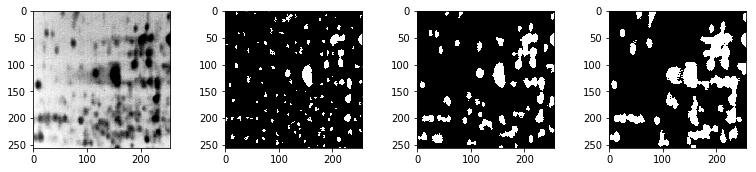

In [15]:
def myHMinima(imIn,h,imOut,nl=Morpho.getDefaultSE()):
    imTmp = Image(imIn)
    add(imIn,h,imTmp)
    dualBuild(imTmp,imIn,imOut,nl)
    minima(imOut,imTmp,nl)
    compare(imTmp,">",0,255,0,imOut)
    
#imIn = Image(images_dir+"/Gray/matric.png")
imIn = Image(images_dir+"/Gray/electrop.png")
imMin20,imMin60,imMin100 = Image(imIn),Image(imIn),Image(imIn)
imLabel = Image(imIn,"UINT16")

myHMinima(imIn,20,imMin20,nl)
label(imMin20, imLabel,nl)
print("number of h-minima for h="+str(20)+": "+ str(maxVal(imLabel)))
myHMinima(imIn,60,imMin60,nl)
label(imMin60, imLabel,nl)
print("number of h-minima for h="+str(60)+": "+ str(maxVal(imLabel)))
myHMinima(imIn,100,imMin100,nl)
label(imMin100, imLabel,nl)
print("number of h-minima for h="+str(100)+": "+ str(maxVal(imLabel)))

disp([imIn,imMin20,imMin60,imMin100])

# Fill holes

The following procedure will fill the holes of an image.It reconstructs connected components of the background that touch the border of the image. It uses a reconstruction by erosion (dualBuild) taking as marker an image with a single minima (value = 0) all along the border of the image and 255 elsewhere.

fillHoles on a binary image


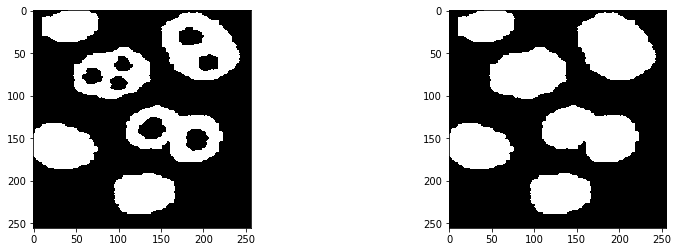

fillHoles on a gray level image


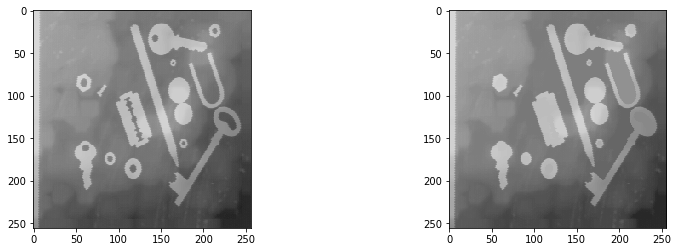

In [11]:
def drawBorder(im,val):
    drawRectangle(im,0,0,im.getWidth(),im.getHeight(),val,False)

def MyFillHoles(imIn,imOut,nl):
    imMark = Image(imIn)
    fill(imMark,0)
    drawBorder(imMark,255)
    inv(imMark,imMark) # imtmp = 0 (border), 255 (otherwise)
    dualBuild(imMark,imIn,imOut,nl) # Reconstruction by erosion of imtmp over im

print ("fillHoles on a binary image")
nl = HexSE()
imIn = Image(images_dir+"/Bin/holes.png")
imres = Image(imIn)
MyFillHoles(imIn,imres,nl)
disp([imIn,imres])

print ("fillHoles on a gray level image")
imIn = Image(images_dir+"/Gray/tools.png")
imres = Image(imIn)
MyFillHoles(imIn,imres,nl)
disp([imIn,imres])

# Tooth Wheel


number of theeth is (Max Label):  120


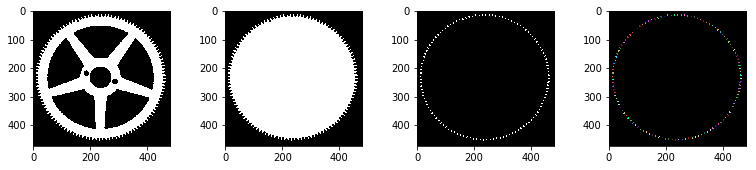

In [17]:
nl = HexSE()
imIn = Image(os.path.join(images_dir, os.path.join("Bin","ruedabin.png")))
imFilled, imTmp, imLabel = Image(imIn),Image(imIn),Image(imIn)
fillHoles(imIn, imFilled,nl)

open(imFilled,  imTmp, nl(3))
sub(imFilled, imTmp, imTmp)
    
open(imTmp, imTmp, nl)

label(imTmp,  imLabel, nl)

print ('number of theeth is (Max Label): ', maxVal(imLabel)) #should be 120
disp([imIn,imFilled,imTmp,imLabel],[False,False,False,True])

## Extremities

This exercise makes use of the geodesic distance function in order to find extremities. First, the centroid of the object is estimated as the maximum of the distance function. Then, the geodesic distance of each pixel to the centroid is computed. Finally, the maxima of this geodesic distance are situated at the extremities of the object.


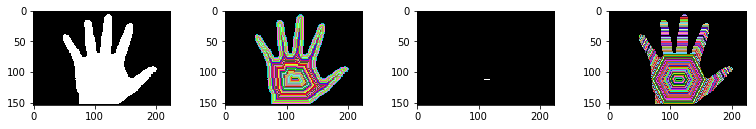

original, distance, max_dist, geoDistance


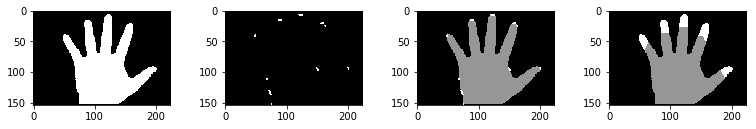

original, extremities, extremities on original, filtered extremities (h-max(20))


In [18]:
# Fonction distance geodesique, en attendant d'avoir la version officielle
def geoDist(im,imPoint,imGeoDist,nl):
    imWork,imTemp = Image(imPoint),Image(imPoint)
    fill(imGeoDist,0)

    cpt=1
    copy(imPoint,imWork)

    #Erode while the image is not empty (volume == 0)
    while(maxVal(imGeoDist)+1 >= cpt):

        geoDil(imWork,im,imTemp,nl)
        
        #Assign the current distance to the modified pixels
        compare(imTemp,">", imWork, cpt, imGeoDist, imGeoDist)  

        #Increase the "distance" variable
        cpt = cpt + 1    
        copy(imTemp, imWork)


nl = HexSE()
a = Image(images_dir+"/Bin/manobin.png")
#a = Image(images_dir+"/Bin/ant.png")
b,c,d,e = Image(a, "UINT16"),Image(a),Image(a, "UINT16"),Image(a, "UINT16")
f,g = Image(a),Image(a)

dist(a,  b, nl)

mymax = maxVal(b)

compare (b, "==", mymax, 255, 0, c)

#compute now the geodesic distance from the maxima of the distance function under the original image
geoDist(a, c, d, nl)
#distanceGeodesic(a, c, d, nl)

disp([a,b,c,d], [False, True, False, True])
print ("original, distance, max_dist, geoDistance")
#regional maxima of the geodesic distance are the extremities
maxima (d, e, nl)
dilate(e,e,nl)# for display purposes

#superposing  the extremities to the original image
compare(a,">",0,128,0,f)
compare(e,">",0,255,f,f)

hMaxima(d,20,b,nl)
compare(a,">",0,128,0,g)
compare(b,">",0,255,g,g)

disp([a,e,f,g])
print("original, extremities, extremities on original, filtered extremities (h-max(20))")